# Analysis of the KMeans method and various ways to found an optimal number of clusters

## Import libraries

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

## Data
Exploratory on the dataset used in this analysis

In [2]:
df = spark.read.parquet("../../../data/clustering/")
print("Nb of points: {0} \n".format(df.count()))
print("Schema of the dataset:")
df.printSchema()
print("\n View of few lines:")
df.show(5)

Nb of points: 1600 

Schema of the dataset:
root
 |-- x: double (nullable = true)
 |-- y: double (nullable = true)


 View of few lines:
+------------------+-------------------+
|                 x|                  y|
+------------------+-------------------+
|-9.536089612616399|-11.045375075619603|
|-10.47557735273648| -9.708859318016877|
| -8.45711895678184|  -9.42398720049261|
| -9.61345564720809| -10.34863203150554|
|-9.675085532529978|-10.757201027930972|
+------------------+-------------------+
only showing top 5 rows



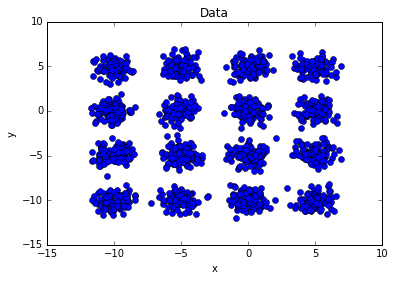

In [3]:
points = df.rdd.map(lambda p: (p["x"], p["y"])).collect()
fig, ax = plt.subplots();
ax.plot(map(lambda x: x[0], points), map(lambda x: x[1], points), 'o');
ax.set_title("Data");
ax.set_xlabel("x");
ax.set_ylabel("y");

## Elbow method

In [4]:
data = (spark.read.parquet("../../../target/data/elbowcost")
        .rdd
        .map(lambda x: (x["k"], x["cost"]))
        .collect())
data.sort(key = lambda x: x[0])

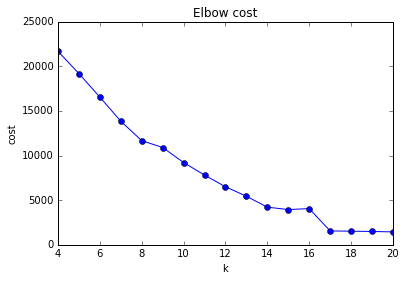

In [5]:
fig, ax = plt.subplots();
ax.plot(map(lambda x: x[0], data), map(lambda x: x[1], data), 'o-');
ax.set_title("Elbow cost");
ax.set_xlabel("k");
ax.set_ylabel("cost");

## Train validation - Elbow method

In [6]:
data = (spark.read.parquet("../../../target/data/trainvalidation/elbowcost/").rdd
        .map(lambda x: (x["k"], x["cost"]))
        .collect())
data.sort(key = lambda x: x[0])

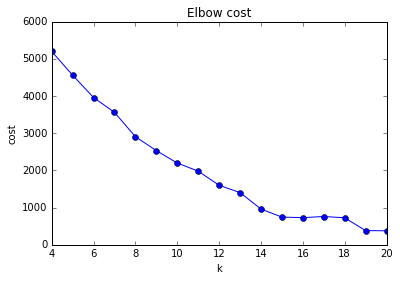

In [7]:
fig, ax = plt.subplots();
ax.plot(map(lambda x: x[0], data), map(lambda x: x[1], data), 'o-');
ax.set_title("Elbow cost");
ax.set_xlabel("k");
ax.set_ylabel("cost");